# Star Wars Survey

What are we trying to do with this dataset?

## Data Import and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null int64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              673 non-null object
Unnamed: 4                                                                                                                                       571 non-null object
Unnamed: 5                                                         

In [6]:
star_wars.describe()

,RespondentID,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,1.186000e+03,835.000000,836.000000,835.000000,836.000000,836.000000,836.000000
mean,3.290128e+09,3.732934,4.087321,4.341317,3.272727,2.513158,3.047847
std,1.055639e+06,1.656122,1.365365,1.400464,1.825901,1.578620,1.666897
min,3.288373e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.289451e+09,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,3.290147e+09,4.000000,4.000000,5.000000,3.000000,2.000000,3.000000
75%,3.290814e+09,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000
max,3.292880e+09,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


## Data Cleaning

### Have you seen? Are you a fan? Cleaning

We simply want to converto to Boolean True/False the first columns

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
yes_no = yes_no = {
    "Yes": True,
    "No": False
}

In [9]:
star_wars.iloc[:,1].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
star_wars.iloc[:,1].head(10)

0    Yes
1     No
2    Yes
3    Yes
4    Yes
5    Yes
6    Yes
7    Yes
8    Yes
9    Yes
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: object

In [11]:
star_wars.iloc[:,1] = star_wars.iloc[:,1].map(yes_no)
star_wars.iloc[:,1].head(10)

0     True
1    False
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

In [12]:
star_wars.iloc[:,1].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [13]:
star_wars.iloc[:,2].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [14]:
star_wars.iloc[:,2].head(10)

0    Yes
1    NaN
2     No
3    Yes
4    Yes
5    Yes
6    Yes
7    Yes
8    Yes
9     No
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

In [15]:
star_wars.iloc[:,2] = star_wars.iloc[:,2].map(yes_no)
star_wars.iloc[:,2].head(10)

0     True
1      NaN
2    False
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

In [16]:
star_wars.iloc[:,2].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Watched Movies multiple choice cleaning

Same as before, we want to convert to Boolean the multiple choice question as well as renaming the columns from Unnamed: 4 to seen_#.

In [17]:
movie_title_cols = star_wars.columns[3:9].tolist()
movie_dict = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones':True,
    'Star Wars: Episode III  Revenge of the Sith':True,
    'Star Wars: Episode IV  A New Hope':True,
    'Star Wars: Episode V The Empire Strikes Back':True,
    'Star Wars: Episode VI Return of the Jedi':True,
    np.NaN: False
}
#star_wars.iloc[:,3:9].map(movie_dict)
for m in movie_title_cols:
    star_wars[m] = star_wars[m].map(movie_dict)
movie_rename_dict = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_EP_I',
    'Unnamed: 4':'seen_EP_II',
    'Unnamed: 5':'seen_EP_III',
    'Unnamed: 6':'seen_EP_IV',
    'Unnamed: 7':'seen_EP_V',
    'Unnamed: 8':'seen_EP_VI'
}
star_wars.rename(columns=movie_rename_dict, inplace=True)
movie_title_cols = star_wars.columns[3:9].tolist()
print(movie_title_cols)

['seen_EP_I', 'seen_EP_II', 'seen_EP_III', 'seen_EP_IV', 'seen_EP_V', 'seen_EP_VI']


In [18]:
for m in movie_title_cols:
    print(star_wars[m].value_counts(dropna=False))

True     673
False    513
Name: seen_EP_I, dtype: int64
False    615
True     571
Name: seen_EP_II, dtype: int64
False    636
True     550
Name: seen_EP_III, dtype: int64
True     607
False    579
Name: seen_EP_IV, dtype: int64
True     758
False    428
Name: seen_EP_V, dtype: int64
True     738
False    448
Name: seen_EP_VI, dtype: int64


### Watched Movies User Rating cleaning

Same as above we want to we want to rename Unnamed columns and this time convert rating into float type values

In [19]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [20]:
rating_rename_dict = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'EP I',
    'Unnamed: 10':'EP II',
    'Unnamed: 11':'EP III',
    'Unnamed: 12':'EP IV',
    'Unnamed: 13':'EP V',
    'Unnamed: 14':'EP VI'
}
star_wars.rename(columns=rating_rename_dict, inplace=True)

In [21]:
print(star_wars.iloc[:,9:15].head())

   EP I  EP II  EP III  EP IV  EP V  EP VI
0   3.0    2.0     1.0    4.0   5.0    6.0
1   NaN    NaN     NaN    NaN   NaN    NaN
2   1.0    2.0     3.0    4.0   5.0    6.0
3   5.0    6.0     1.0    2.0   4.0    3.0
4   5.0    4.0     6.0    2.0   1.0    3.0


In [22]:
rating_movie_cols = star_wars.columns[9:15].tolist()
for m in rating_movie_cols:
    print(star_wars[m].value_counts(dropna=False))

NaN    351
4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: EP I, dtype: int64
NaN    350
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: EP II, dtype: int64
NaN    351
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: EP III, dtype: int64
NaN    350
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: EP IV, dtype: int64
NaN    350
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: EP V, dtype: int64
NaN    350
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: EP VI, dtype: int64


### Find Movie Ranking

In [23]:
movie_ranking_means = star_wars.iloc[:,9:15].mean()

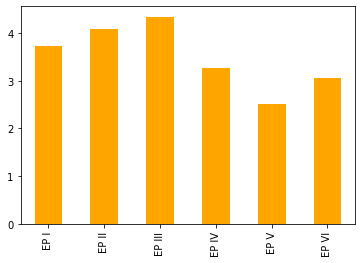

In [24]:
movie_ranking_means.plot(kind='bar',color='orange')

Looks like Episode V is considered the best by users as well as es Episode VI is the 2nd best ranked, slightly ahead of Episode IV. The First Trilogy (in release order) by far ranks better among users.

### Find Most Watched Movies

In [25]:
movie_most_seen = star_wars.iloc[:,3:9].sum()

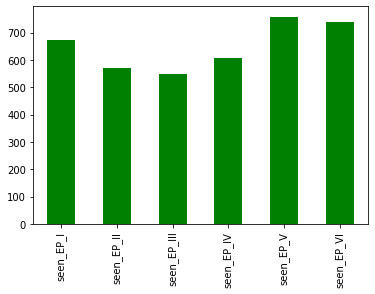

In [26]:
movie_most_seen.plot(kind='bar',color='green')

Overall Episode V is still the most seen, followed by Episode VI, this correlates well with rankings. Episode IV (the very first movie) only ranks 4th barey ahead of Episode II and III and behinde Episode I.

## Next Steps
We are going to perform the same 2 anaylises based on:
1. Gender
2. If the user identifies as a Star Wars fan
3. If the user identifies as a Star Trek fan (hater potential?)

## Gender Analysis
We spli the dataframe in male and female and redo the ranking and most viewed analyses:

In [27]:
star_wars_males = star_wars[star_wars['Gender']=='Male'].copy()
star_wars_females = star_wars[star_wars['Gender']=='Female'].copy()

### Movie Ranking

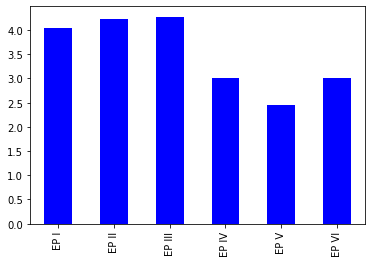

In [28]:
movie_ranking_means_males = star_wars_males.iloc[:,9:15].mean()
movie_ranking_means_males.plot(kind='bar',color='blue')

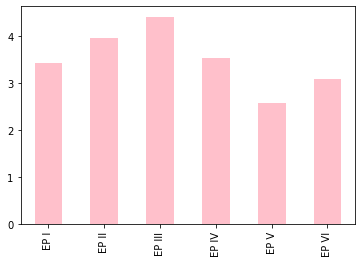

In [29]:
movie_ranking_means_females = star_wars_females.iloc[:,9:15].mean()
movie_ranking_means_females.plot(kind='bar',color='pink')

Males looks firmly preferring the First Trilogy (in release order), without any defined ranking over the episodes of the Second Trilogy (EPi I, II, III have similar averages). while females somehow don't dislike the Second Trilogy as much, with Episode I ranking 3rd and close to Episode VI.
Episode V and VI are still top for both demographics.

### Most Watched Movies

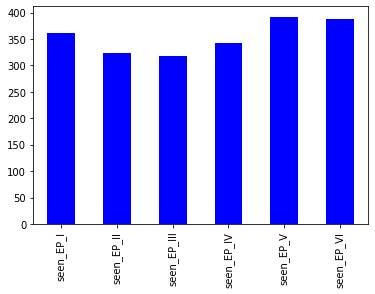

In [30]:
movie_most_seen_males = star_wars_males.iloc[:,3:9].sum()
movie_most_seen_males.plot(kind='bar',color='blue')

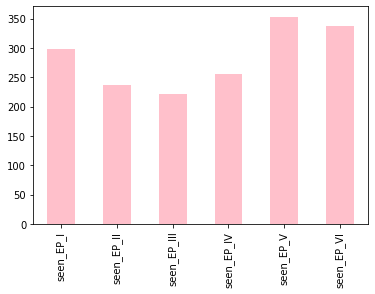

In [31]:
movie_most_seen_females = star_wars_females.iloc[:,3:9].sum()
movie_most_seen_females.plot(kind='bar',color='pink')

Males users seem to have a more even distribution of movies watched compared to Females

## Star Wars Fans Analysis
We split the dataframe between users who identify as Star Wars Fans and not

In [32]:
star_wars_fans = star_wars[star_wars.iloc[:,2]==True]
star_wars_fans.head()
star_wars_not_fans = star_wars[star_wars.iloc[:,2]==False]

### Movie Ranking

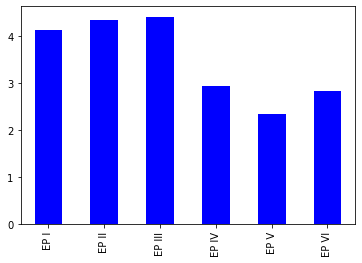

In [33]:
movie_ranking_means_fans = star_wars_fans.iloc[:,9:15].mean()
movie_ranking_means_fans.plot(kind='bar',color='blue')

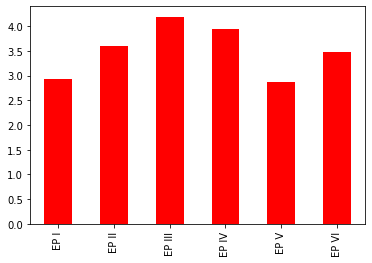

In [34]:
movie_ranking_means_not_fans = star_wars_not_fans.iloc[:,9:15].mean()
movie_ranking_means_not_fans.plot(kind='bar',color='red')

There is a clear difference in perception between Fans (who clearly prefer the First Trilogy and slight preference for Ep VI over IV) and Non-Fans, who have mixed preferences - EP. V is still the best for this group, but very closet o Ep. I, while Ep. II has a better ranking compared to EP. VI and IV. Ep. III is considered the worst across both groups.

### Most Watched Movies

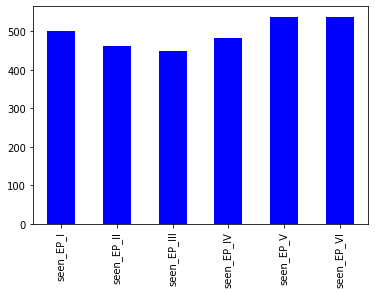

In [35]:
movie_most_seen_fans = star_wars_fans.iloc[:,3:9].sum()
movie_most_seen_fans.plot(kind='bar',color='blue')

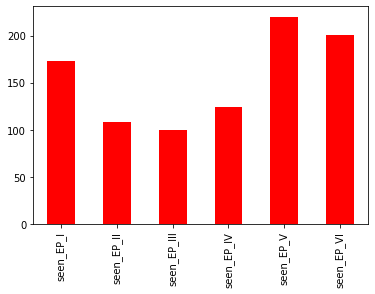

In [36]:
movie_most_seen_not_fans = star_wars_not_fans.iloc[:,3:9].sum()
movie_most_seen_not_fans.plot(kind='bar',color='red')

Fans have watched pretty much all movies, with preference over the First Trilogy, with EP. I ranking 3rd, but closet o EP. IV, while Non-Fans have mainly watched EP. V, VI and I.

## Star Trek Fans
We split the dataframe between users who identify as Star Trek Fans and not. This was a rival franchise, so maybe there is some hating.

In [37]:
star_trek_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='Yes']
star_trek_not_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='No']

### Movie Ranking

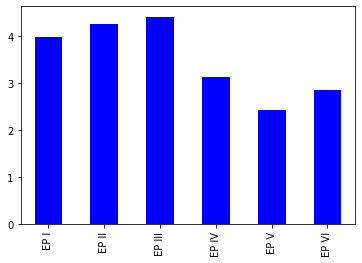

In [38]:
movie_ranking_means_trek_fans = star_trek_fans.iloc[:,9:15].mean()
movie_ranking_means_trek_fans.plot(kind='bar',color='blue')

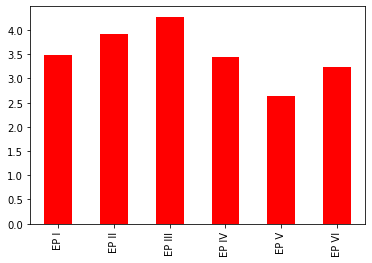

In [39]:
movie_ranking_means_trek_not_fans = star_trek_not_fans.iloc[:,9:15].mean()
movie_ranking_means_trek_not_fans.plot(kind='bar',color='red')

Users in the Trek Category still have a firm preference for the First Trilogy over the Second, while Non-Fans have more mixed preferences, with EO. I closet o EP. VI and IV.

### Most Watched Movies

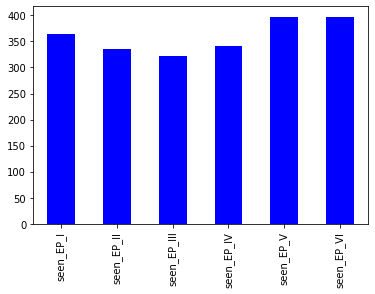

In [40]:
movie_most_seen_trek_fans = star_trek_fans.iloc[:,3:9].sum()
movie_most_seen_trek_fans.plot(kind='bar',color='blue')

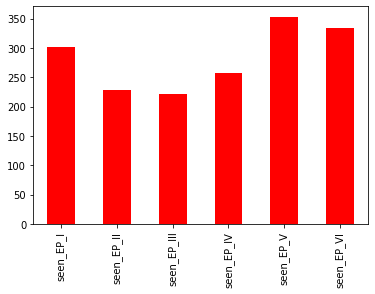

In [41]:
movie_most_seen_not_trek_fans = star_trek_not_fans.iloc[:,3:9].sum()
movie_most_seen_not_trek_fans.plot(kind='bar',color='red')

There isn't a particular callout for most watched movies for users that identify as Star Trek fans or not.

### Initial Conclusions
- Fans and Males prefer the First Trilogy (release order) over the Second, with a pretty even distribution in movies watched;
- Non-Fans and Females have a less
- All demographics analyzed prefer Ep. V as the best movie of the franchise. Ep II and III tend to be considered worst pretty unanimously. Ep VI is 2nd best in most demographics, while Ep I is sometimes preferred to the first movie (Ep. I).

## Next Steps 2:
Non-binary columns:
- Education
- Location (Census Region)
- Which character shot first?
Clean columns 15 to 29:
- Who is the most liked characters?
- Who is the most disliked character?
- Who is the most controversial?

In [42]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_EP_I', 'seen_EP_II', 'seen_EP_III', 'seen_EP_IV', 'seen_EP_V',
       'seen_EP_VI', 'EP I', 'EP II', 'EP III', 'EP IV', 'EP V', 'EP VI',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
     

In [43]:
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64